# Recurrent Soft Actor-Critic: Simulations and plots

In [1]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrandom

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="darkgrid", palette="deep")
palette = sns.color_palette().as_hex()

import pickle

# import local libraries
from environments.linear import Linear_SDI
from environments.box import Box_SDI
from environments.orbit import Orbital_SDI
from src.utilities.run_trial import run_trial

from src.OptimalControl.LQR import LQRSolver
from src.OptimalControl.utilities.run import run_LQR

from src.SoftActorCriticRNN.main import SACAgent

systems = ['linear', 'box', 'orbital']
environments = {'linear':Linear_SDI(), 'box':Box_SDI(), 'orbital':Orbital_SDI()}
starting_points = {'linear':jnp.array([10, 0]), 'box': jnp.array([4, 0]), 'orbital': jnp.array([(5/6)*np.pi, 0])}

dims = {'linear':{'xmin':-10, 'xmax':10, 'ymin':-5, 'ymax':5},
        'box':{'xmin':-5, 'xmax':5, 'ymin':-5, 'ymax':5},
        'orbital':{'xmin':-np.pi, 'xmax':np.pi, 'ymin':-4, 'ymax':4}}

## Linear SDI

In [6]:
# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

hidden_size = 32
history_size = 12

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 5
Nep = 10000
noise_lvl = [.5]
method = 'RSAC'
system = 'linear'
name = 'RSAC_linear'


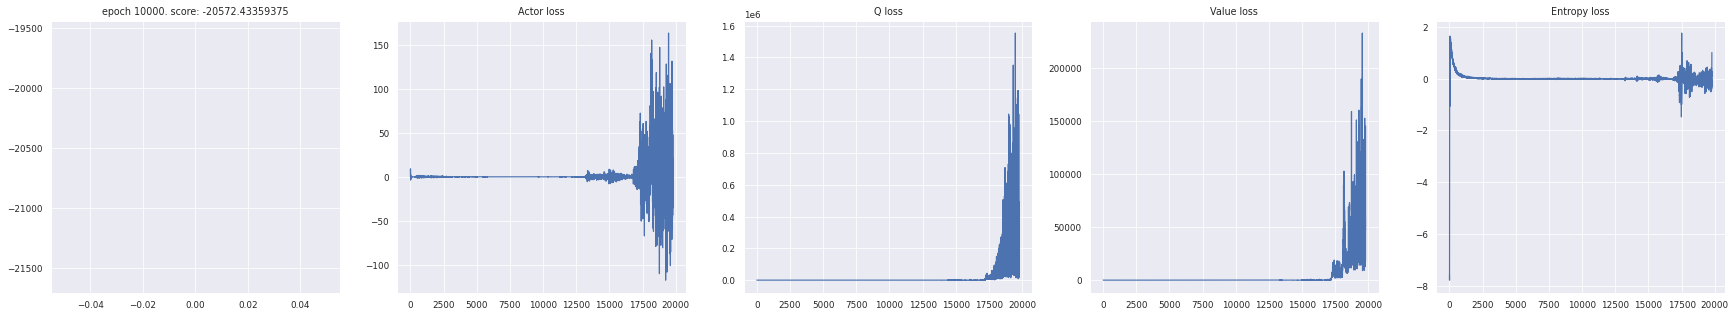

In [7]:
# RUN
PARAMS = {name:{}}

for lvl in range(1):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(0, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Linear_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-3,
            gamma=gamma,
            hidden_size=hidden_size,
            history_size=history_size,
            RNN_type='GRU',
            linear_policy = True
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor_model[0],
                        'q1': agent.q1_model[0],
                        'q2': agent.q2_model[0],
                        'v': agent.value_model[0],
                        'vt': agent.value_target_fn}

            filename = f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'

            if not os.path.isdir(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}'):
                os.makedirs(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}')
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Orbital SDI

In [2]:
# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

hidden_size = 32
history_size = 12

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 5
Nep = 10000
noise_lvl = [.1, .2, .3, .4]
method = 'RSAC'
system = 'orbital'
name = 'RSAC_orbital'


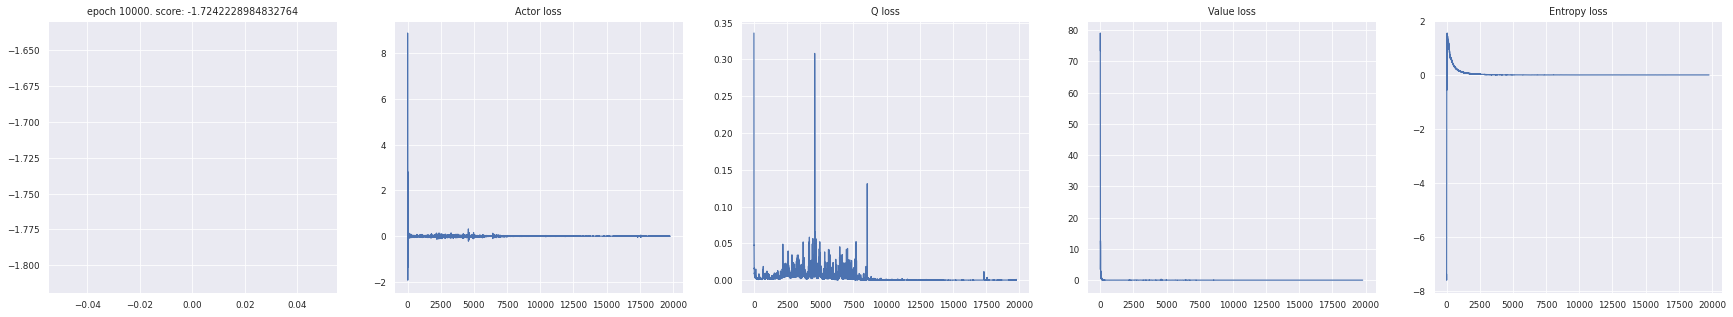

In [3]:
# RUN
PARAMS = {name:{}}

for lvl in range(4):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(0, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Orbital_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-3,
            gamma=gamma,
            hidden_size=hidden_size,
            history_size=history_size,
            RNN_type='GRU',
            linear_policy = False
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor_model[0],
                        'q1': agent.q1_model[0],
                        'q2': agent.q2_model[0],
                        'v': agent.value_model[0],
                        'vt': agent.value_target_fn}

            filename = f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'

            if not os.path.isdir(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}'):
                os.makedirs(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}')
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Box constrained particle

In [3]:
# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

hidden_size = 32
history_size = 12

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 5
Nep = 10000
noise_lvl = [.1, .2, .3, .4]
method = 'RSAC'
system = 'box'
name = 'RSAC_box'


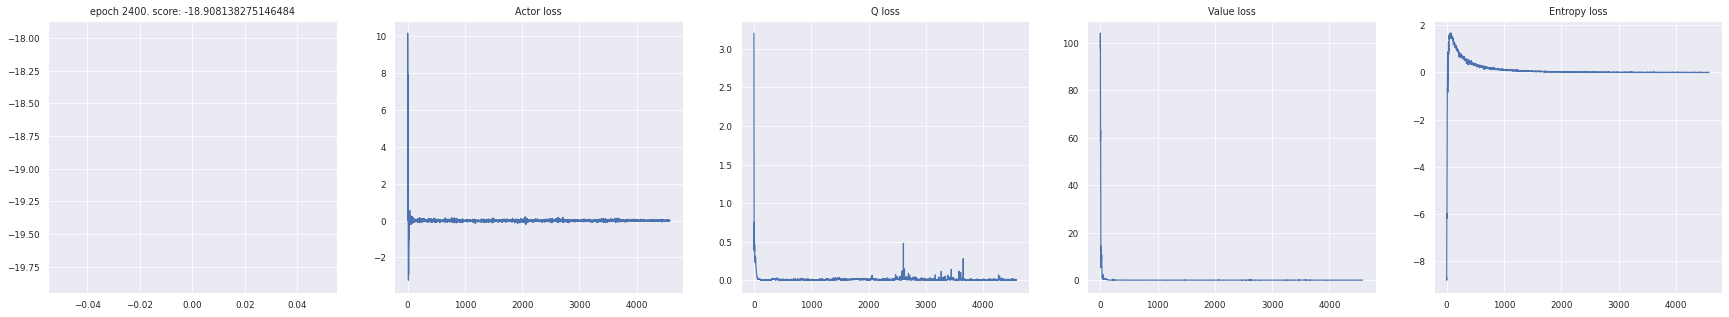

KeyboardInterrupt: 

In [4]:
# RUN
PARAMS = {name:{}}

for lvl in range(4):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(0, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Box_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-3,
            gamma=gamma,
            hidden_size=hidden_size,
            history_size=history_size,
            RNN_type='GRU',
            linear_policy = False
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor_model[0],
                        'q1': agent.q1_model[0],
                        'q2': agent.q2_model[0],
                        'v': agent.value_model[0],
                        'vt': agent.value_target_fn}

            filename = f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'

            if not os.path.isdir(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}'):
                os.makedirs(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}')
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Undercomplete

In [3]:
# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

hidden_size = 32
history_size = 12

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 5
Nep = 10000
noise_lvl = [0]
method = 'RSAC'
system = 'orbital'
name = 'RSAC_orbital_undercomplete'

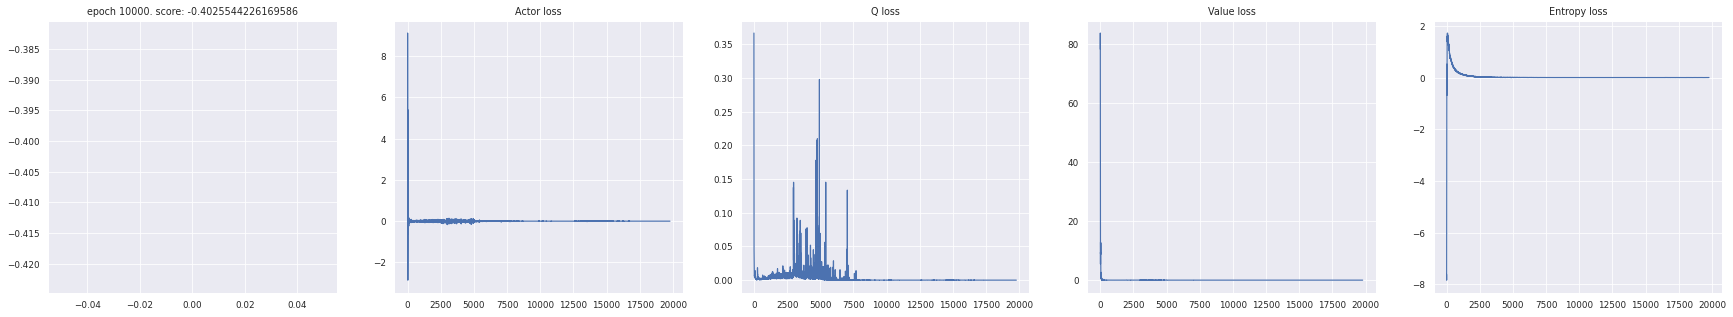

In [5]:
# RUN
PARAMS = {name:{}}

for lvl in range(1):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(0, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Orbital_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]
        env.C = jnp.array([[1, 0], [0, 0]])

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-3,
            gamma=gamma,
            hidden_size=hidden_size,
            history_size=history_size,
            RNN_type='GRU',
            linear_policy = False
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor_model[0],
                        'q1': agent.q1_model[0],
                        'q2': agent.q2_model[0],
                        'v': agent.value_model[0],
                        'vt': agent.value_target_fn}

            filename = f'models/{method}/{system}/undercomplete/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'
            location = f'models/{method}/{system}/undercomplete/{noise_lvl[lvl]}/{factor*200}'
            if not os.path.isdir(location):
                os.makedirs(location)
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [2]:
method = 'RSAC'
system = 'orbital'
noise = 0
Nep = 10000
idx = 0

filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
with open(filename, 'rb') as handle:
    params = pickle.load(handle)

pi = params['pi']

## Unknown bias

In [3]:
# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

hidden_size = 32
history_size = 12

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 10
Nep = 30000
noise_lvl = [0]
method = 'RSAC'
system = 'orbital'
name = 'RSAC_orbital_UB'

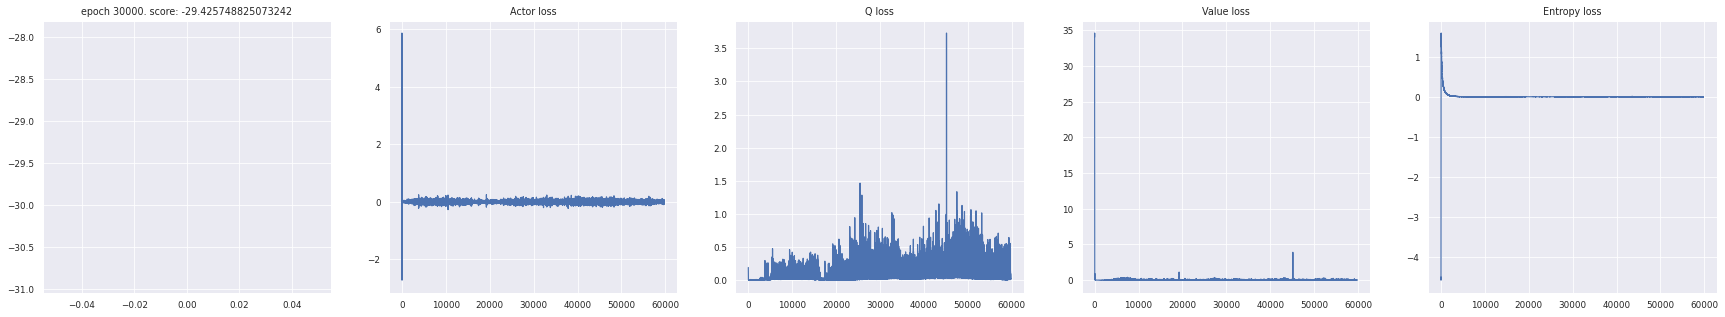

In [4]:
# RUN
PARAMS = {name:{}}

for lvl in range(1):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(5, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Orbital_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=0,
            gamma=gamma,
            hidden_size=hidden_size,
            history_size=history_size,
            RNN_type='GRU',
            linear_policy = False
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)
            agent.env.B = agent.env.B * np.random.choice([-1, 1])

            params = {'pi': agent.actor_model[0],
                        'q1': agent.q1_model[0],
                        'q2': agent.q2_model[0],
                        'v': agent.value_model[0],
                        'vt': agent.value_target_fn}

            filename = f'models/{method}/{system}/UB/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'
            location = f'models/{method}/{system}/UB/{noise_lvl[lvl]}/{factor*200}'
            if not os.path.isdir(location):
                os.makedirs(location)
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


# Generate plots

In [7]:
# def run_SAC(env, controller, key, T=20, dt=.1, x0=None, recurrent=False, **kwargs):
#     time_space = np.arange(0, T, dt)
#     X = np.zeros((len(time_space)+1, env.dim))
#     Y = np.zeros((len(time_space)+1, env.dim))
#     U = np.zeros((len(time_space), env.dim))
#     R = np.zeros((len(time_space), env.dim))

#     y = env.reset(x0=x0)
#     u = 0

#     if recurrent:
#         hist_size = kwargs.get('history_size', 12)
#         state_memory = np.zeros((hist_size, len(y)))
#         state_memory[-1] = y
#         control_memory = np.zeros((hist_size, 1))

#     X[0] = env.state
#     Y[0] = y

#     key, subkey = jrandom.split(key)
#     for it, _ in enumerate(time_space):
#         if recurrent:
#             u, _ = controller(state_memory, control_memory, key)
#         else:
#             u, _ = controller(env.state, key)
#         y, rew, _, _ = env.step(u, subkey)

#         if recurrent:
#             state_memory[1:] = state_memory[:-1]
#             state_memory[-1] = y
#             control_memory[1:] = control_memory[1:-1]
#             control_memory[-1] = u

#         X[it+1] = env.state
#         Y[it+1] = y
#         U[it] = u
#         R[it] = rew

#         key, subkey = jrandom.split(key)
    
#     return X, Y, U, R

def run_SAC(env, controller, key, x0=None, recurrent=False, **kwargs):
    key, subkey = jrandom.split(key)
    hidden_size = kwargs.get('hidden_size', 32)
    T = kwargs.get('T', 20)
    dt = kwargs.get('dt', env.dt)

    time_space = np.arange(0, T, dt)
    X = np.zeros((len(time_space)+1, env.dim))
    Y = np.zeros((len(time_space)+1, env.dim))
    U = np.zeros(len(time_space))
    R = np.zeros(len(time_space))

    y = env.reset(x0=x0)
    hidden_state = jnp.zeros(hidden_size)
    control = 0

    X[0] = env.state
    Y[0] = y

    for it, t in enumerate(time_space):
        if recurrent:
            control, hidden_state = controller.predict_step(y, control, hidden_state)
        else:
            control, _ = controller(env.state, subkey)
        y, reward, done, _ = env.step(control, key=key)

        X[it+1] = env.state
        Y[it+1] = y
        U[it] = control
        R[it] = reward

        key, subkey = jrandom.split(key)
    
    return X, Y, U, R


def test_SAC(key, controller, env, x0_space, T=20, dt=.1, recurrent=False, **kwargs):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_SAC(env, controller, keys[i], T=T, dt=dt, x0=x0, recurrent=recurrent, **kwargs)
        R[i] = np.sum(rew) / T
    return R

## Linear SDI

In [20]:
seed = 0

method = 'RSAC'
system = 'linear'
noise = 0
Nep = 10000

history_size = 12

env = Linear_SDI()
env.v = jnp.identity(2) * noise

### Trajectory

In [21]:
x0 = jnp.array([10, 0])

LQR = LQRSolver(env.A, env.B, env.G, env.R)
X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
info_lqr = {'X': X, 'R': R}

info_sac = {'X': [], 'R': []}
for idx in range(10):
    filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        agent = pickle.load(file)
    controller = agent['pi']
    X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0, recurrent=True, history_size=history_size)
    info_sac['X'] += [X]
    info_sac['R'] += [R]


In [22]:
env.v = jnp.identity(env.dim) * 0

N = 10

x_space = np.linspace(-10, 10, N)
v_space = np.linspace(-5, 5, N)
xv, vv = np.meshgrid(x_space, v_space)
qx = np.zeros((N,N))
qv = np.zeros((N,N))

for i, x in enumerate(x_space):
  for j, v in enumerate(v_space):
    state = jnp.array([xv[i,j], vv[i,j]])
    dx, dv = env.predict_deriv(state, 0)
    qx[i,j] = dx
    qv[i,j] = dv

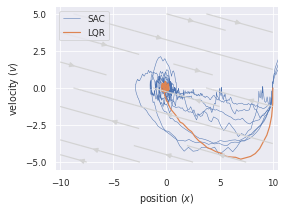

In [23]:
fig, ax = plt.subplots(figsize=(4, 3))

for X in info_sac['X']:
    ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
ax.plot([], [], linewidth=.5, color=palette[0], label='SAC')

X = info_lqr['X']
ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

ax.streamplot(xv, vv, qx, qv, density=.3, color='lightgrey')

ax.set_xlim([-10.5, 10.5])
ax.set_ylim([-5.5, 5.5])
ax.set_xticks(np.linspace(-10, 10, 5))
ax.set_yticks(np.linspace(-5, 5, 5))

ax.set_xlabel(r'position ($x$)')
ax.set_ylabel(r'velocity ($v$)')

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_V{noise}_trajectory.png'
plt.savefig(figurename, dpi=300)

plt.show()

### Training convergence

In [ ]:
I = 5
J = 10
K = int(Nep/200)

key = jrandom.PRNGKey(0)
x0_space = jrandom.uniform(key, (I,2), minval=-5, maxval=5)

In [ ]:
def test_SAC(key, method, system, noise, env, x0_space, J, K, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros((I, J, K))
    for k in range(1, K+1):
        Nep = int(200*k)
        for j in range(J):
            filename = f'models/{method}/{system}/{noise}/{Nep}/{j}.pickle'
            with open(filename, 'rb') as file:
                agent = pickle.load(file)
            controller = agent['pi']
            for i, x0 in enumerate(x0_space):
                _, _, _, R = run_SAC(env, controller, keys[i], T=T, dt=dt, x0=x0)
                R[i,j,k-1] = np.sum(R)
    return np.mean(R, axis=1) / T

R = test_SAC(key, method, system, noise, env, x0_space, J, K)

In [ ]:
filename = f'models/{method}/{system}/{noise}/R.pickle'

with open(filename, 'wb') as handle:
    pickle.dump(R, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename, 'rb') as file:
    R = pickle.load(file)

In [ ]:
# Calculate average and confidence bound
average = np.mean(R, axis=0)
lower_bound = np.quantile(R, .25, axis=0)
upper_bound = np.quantile(R, .75, axis=0)

xticks = np.arange(len(average))

# plot average trajectory with confidence bound
fig, ax = plt.subplots(figsize=(4, 3))
sns.lineplot(x=xticks, y=average, ax=ax, label='SAC')
ax.fill_between(xticks, lower_bound, upper_bound, alpha=.2)

plt.xticks(xticks, [str(int((x+1)*200)) for x in xticks])

ax.set_xlabel('number of training steps')
ax.set_ylabel('average reward')

plt.show()

## Orbital

In [41]:
seed = 0

method = 'RSAC'
system = 'orbital'
history_size = 12
noise = 0.5
Nep = 10000

env = Orbital_SDI()
env.v = jnp.identity(2) * noise

### Trajectory

In [42]:
x0 = jnp.array([(5/6)*np.pi, 0])

LQR = LQRSolver(env.A, env.B, env.G, env.R)
X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
info_lqr = {'X': X, 'R': R}

info_sac = {'X': [], 'R': []}
for idx in range(5):
    filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        agent = pickle.load(file)
    controller = agent['pi']
    X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0, recurrent=True, history_size=history_size)
    info_sac['X'] += [X]
    info_sac['R'] += [R]


In [43]:
env.v = jnp.identity(env.dim) * 0

N = 10

x_space = np.linspace(-np.pi, np.pi, N)
v_space = np.linspace(-4, 4, N)
xv, vv = np.meshgrid(x_space, v_space)
qx = np.zeros((N,N))
qv = np.zeros((N,N))

for i, x in enumerate(x_space):
  for j, v in enumerate(v_space):
    state = jnp.array([xv[i,j], vv[i,j]])
    dx, dv = env.predict_deriv(state, 0)
    qx[i,j] = dx
    qv[i,j] = dv

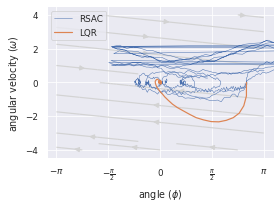

In [44]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.streamplot(xv, vv, qx, qv, density=.3, color='lightgrey')

for X in info_sac['X']:
    idx_tmp = np.where(X[:,0] <= -np.pi/2)[0]
    X[idx_tmp] += jnp.array([2*np.pi, 0])
    ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
ax.plot([], [], linewidth=.5, color=palette[0], label='RSAC')

X = info_lqr['X']
idx_tmp = np.where(X[:,0] <= -np.pi/2)[0]
X[idx_tmp] += jnp.array([2*np.pi, 0])
ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

ax.set_xlim([-np.pi-.3, np.pi+.3])
ax.set_ylim([-4.5, 4.5])
ax.set_xticks(np.linspace(-np.pi, np.pi, 5), [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
ax.set_yticks(np.linspace(-4, 4, 5))

ax.set_xlabel(r'angle ($\phi$)')
ax.set_ylabel(r'angular velocity ($\omega$)')

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_V{noise}_trajectory.png'
plt.savefig(figurename, dpi=300)

plt.show()

## Plot: trajectory

### Functions

In [29]:
def simulate_lqr(env, x0):
    LQR = LQRSolver(env.A, env.B, env.G, env.R)
    X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
    info_lqr = {'X': X, 'R': R}
    return info_lqr

def simulate_rsac(env, method, system, noise, Nep, x0, n_models=5, history_size=12):
    info_sac = {'X': [], 'R': []}
    for idx in range(n_models):
        filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0, recurrent=True, history_size=history_size)
        info_sac['X'] += [X]
        info_sac['R'] += [R]
    return info_sac


In [30]:
def generate_flow(env, dims, N=10):
    env.v = jnp.identity(env.dim) * 0

    x_space = np.linspace(dims['xmin'], dims['xmax'], N)
    y_space = np.linspace(dims['ymin'], dims['ymax'], N)
    xv, yv = np.meshgrid(x_space, y_space)
    qx = np.zeros((N,N))
    qy = np.zeros((N,N))
    
    for i, x in enumerate(x_space):
        for j, y in enumerate(y_space):
            state = jnp.array([xv[i,j], yv[i,j]])
            dx, dy = env.predict_deriv(state, 0)
            qx[i,j] = dx
            qy[i,j] = dy
    return xv, yv, qx, qy


In [31]:
def plot_trajectory(env, method, system, noise, Nep, x0, n_models=5, history_size=12):
    dims = {'linear':{'xmin':-10, 'xmax':10, 'ymin':-5, 'ymax':5},
        'box':{'xmin':-5, 'xmax':5, 'ymin':-5, 'ymax':5},
        'orbital':{'xmin':-np.pi, 'xmax':np.pi, 'ymin':-4, 'ymax':4}}
    
    # Generate data
    info_lqr = simulate_lqr(env, x0)
    info_rsac = simulate_rsac(env, method, system, noise, Nep, x0, n_models=n_models, history_size=history_size)
    xv, yv, qx, qy = generate_flow(env, dims[system])

    # Plot trajectory
    fig, ax = plt.subplots(figsize=(4, 3))

    ax.streamplot(xv, yv, qx, qy, density=.3, color='lightgrey')

    threshold = .5  # Adjust the threshold value as per your requirement
    for X in info_rsac['X']:
        if system == 'box':
            diff = np.abs(np.diff(X[:, 1]))
            invalid_indices = np.where(diff > threshold)[0] + 1  # Find the indices where the difference is less than the threshold
            X[invalid_indices, :] = np.nan  # Replace the values with NaNs
        elif system == 'orbital':
            diff = np.abs(np.diff(X[:, 0]))
            invalid_indices = np.where(diff > np.pi)[0] + 1  # Find the indices where the difference is less than the threshold
            X[invalid_indices, :] = np.nan  # Replace the values with NaNs
        ax.plot(X[:, 0], X[:, 1], linewidth=0.5, color=palette[2])

    # for X in info_rsac['X']:
    #     ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
    ax.plot([], [], linewidth=.5, color=palette[2], label='RSAC')

    X = info_lqr['X']
    ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

    ax.set_xlim([dims[system]['xmin'] - .5, dims[system]['xmax'] + .5])
    ax.set_ylim([dims[system]['ymin'] - .5, dims[system]['ymax'] + .5])
    ax.set_xticks(np.linspace(dims[system]['xmin'], dims[system]['xmax'], 5))
    if system == 'orbital':
        ax.set_xticklabels([r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    ax.set_yticks(np.linspace(dims[system]['ymin'], dims[system]['ymax'], 5))

    ax.set_xlabel(r'position ($x$)')
    ax.set_ylabel(r'velocity ($v$)')

    ax.legend()

    plt.tight_layout()

    figurename = f'figures/{method}/{method}_{system}_V{noise}_trajectory.png'
    plt.savefig(figurename, dpi=300)

    plt.show()

    return info_lqr, info_rsac

### $\sigma_v = 0$

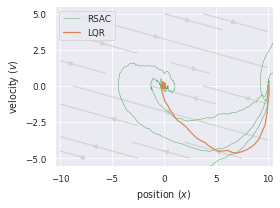

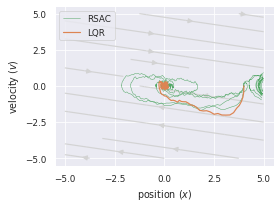

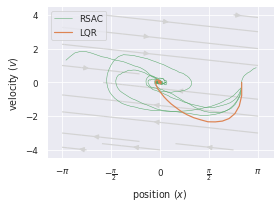

In [32]:
systems = ['linear', 'box', 'orbital']
environments = {'linear':Linear_SDI(), 'box':Box_SDI(), 'orbital':Orbital_SDI()}
starting_points = {'linear':jnp.array([10, 0]), 'box': jnp.array([4, 0]), 'orbital': jnp.array([(5/6)*np.pi, 0])}

method = 'RSAC'
noise = 0
Nep = 10000

for system in systems:
    env = environments[system]
    x0 = starting_points[system]

    env.v = jnp.identity(2) * noise
    info_lqr, info_rsac = plot_trajectory(env, method, system, noise, Nep, x0, n_models=5, history_size=12)


### $\sigma_v = .5$

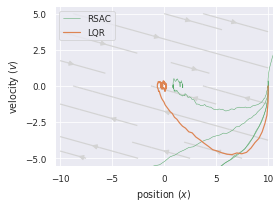

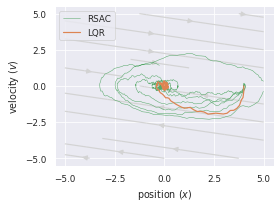

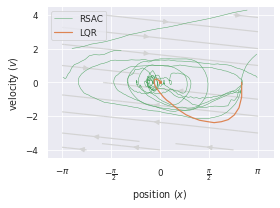

In [33]:
systems = ['linear', 'box', 'orbital']
environments = {'linear':Linear_SDI(), 'box':Box_SDI(), 'orbital':Orbital_SDI()}
starting_points = {'linear':jnp.array([10, 0]), 'box': jnp.array([4, 0]), 'orbital': jnp.array([(5/6)*np.pi, 0])}

method = 'RSAC'
noise = .5
Nep = 10000

for system in systems:
    env = environments[system]
    x0 = starting_points[system]

    env.v = jnp.identity(2) * noise
    info_lqr, info_rsac = plot_trajectory(env, method, system, noise, Nep, x0, n_models=5, history_size=12)


## Plot: Undercomplete

In [11]:
def simulate_lqr(env, x0):
    LQR = LQRSolver(env.A, env.B, env.G, env.R)
    X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
    info_lqr = {'X': X, 'R': R}
    return info_lqr

def simulate_rsac_undercomplete(env, method, system, noise, Nep, x0, n_models=5, history_size=12):
    info_sac = {'X': [], 'R': []}
    for idx in range(n_models):
        filename = f'models/{method}/{system}/undercomplete/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0, recurrent=True, history_size=history_size)
        info_sac['X'] += [X]
        info_sac['R'] += [R]
    return info_sac


In [12]:
def generate_flow(env, dims, N=10):
    env.v = jnp.identity(env.dim) * 0

    x_space = np.linspace(dims['xmin'], dims['xmax'], N)
    y_space = np.linspace(dims['ymin'], dims['ymax'], N)
    xv, yv = np.meshgrid(x_space, y_space)
    qx = np.zeros((N,N))
    qy = np.zeros((N,N))
    
    for i, x in enumerate(x_space):
        for j, y in enumerate(y_space):
            state = jnp.array([xv[i,j], yv[i,j]])
            dx, dy = env.predict_deriv(state, 0)
            qx[i,j] = dx
            qy[i,j] = dy
    return xv, yv, qx, qy


In [16]:
def plot_trajectory_undercomplete(env, method, system, noise, Nep, x0, n_models=5, history_size=12):
    dims = {'linear':{'xmin':-10, 'xmax':10, 'ymin':-5, 'ymax':5},
        'box':{'xmin':-5, 'xmax':5, 'ymin':-5, 'ymax':5},
        'orbital':{'xmin':-np.pi, 'xmax':np.pi, 'ymin':-4, 'ymax':4}}
    
    # Generate data
    info_lqr = simulate_lqr(env, x0)
    info_rsac = simulate_rsac_undercomplete(env, method, system, noise, Nep, x0, n_models=n_models, history_size=history_size)
    xv, yv, qx, qy = generate_flow(env, dims[system])

    # Plot trajectory
    fig, ax = plt.subplots(figsize=(4, 3))

    ax.streamplot(xv, yv, qx, qy, density=.3, color='lightgrey')

    threshold = .5  # Adjust the threshold value as per your requirement
    for X in info_rsac['X']:
        if system == 'box':
            diff = np.abs(np.diff(X[:, 1]))
            invalid_indices = np.where(diff > threshold)[0] + 1  # Find the indices where the difference is less than the threshold
            X[invalid_indices, :] = np.nan  # Replace the values with NaNs
        elif system == 'orbital':
            diff = np.abs(np.diff(X[:, 0]))
            invalid_indices = np.where(diff > np.pi)[0] + 1  # Find the indices where the difference is less than the threshold
            X[invalid_indices, :] = np.nan  # Replace the values with NaNs
        ax.plot(X[:, 0], X[:, 1], linewidth=0.5, color=palette[2])

    # for X in info_rsac['X']:
    #     ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
    ax.plot([], [], linewidth=.5, color=palette[2], label='RSAC')

    X = info_lqr['X']
    ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

    ax.set_xlim([dims[system]['xmin'] - .5, dims[system]['xmax'] + .5])
    ax.set_ylim([dims[system]['ymin'] - .5, dims[system]['ymax'] + .5])
    ax.set_xticks(np.linspace(dims[system]['xmin'], dims[system]['xmax'], 5))
    if system == 'orbital':
        ax.set_xticklabels([r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    ax.set_yticks(np.linspace(dims[system]['ymin'], dims[system]['ymax'], 5))

    ax.set_xlabel(r'position ($x$)')
    ax.set_ylabel(r'velocity ($v$)')

    ax.legend()

    plt.tight_layout()

    figurename = f'figures/{method}/{method}_{system}_undercomplete_V{noise}_trajectory.png'
    plt.savefig(figurename, dpi=300)

    plt.show()

    return info_lqr, info_rsac

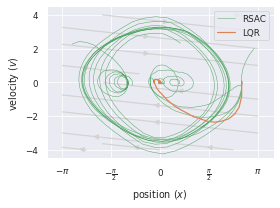

In [17]:
systems = ['linear', 'box', 'orbital']
environments = {'linear':Linear_SDI(), 'box':Box_SDI(), 'orbital':Orbital_SDI()}
starting_points = {'linear':jnp.array([10, 0]), 'box': jnp.array([4, 0]), 'orbital': jnp.array([(5/6)*np.pi, 0])}

method = 'RSAC'
noise = 0
Nep = 10000

for system in ['orbital']:
    env = environments[system]
    x0 = starting_points[system]

    env.C = jnp.array([[1, 0], [0, 0]])
    env.v = jnp.identity(2) * noise
    info_lqr, info_rsac = plot_trajectory_undercomplete(env, method, system, noise, Nep, x0, n_models=5, history_size=12)


In [21]:
def evaluate_training_undercomplete(env, method, system, noise, Nep):
    R_training = np.zeros((int(Nep/200), 5, I))
    for it, ep in enumerate(np.arange(200, Nep+200, 200)):
        R_training[it, :, :] = evaluate_rsac_undercomplete(env, method, system, noise, ep)
    filename = f'data/{method}/{system}/training_v{noise}_undercomplete.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_training, handle, protocol=pickle.HIGHEST_PROTOCOL)

def evaluate_rsac_undercomplete(env, method, system, noise, Nep):
    R_jax = np.zeros((5, len(x0_space)))
    for idx in range(5):
        filename = f'models/{method}/{system}/undercomplete/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        if method == 'RSAC':
            R_jax[idx,:] = test_SAC(key, controller, env, x0_space, recurrent=True, history_size=12)
        else:
            R_jax[idx,:] = test_SAC(key, controller, env, x0_space)
    return R_jax

In [23]:
for method in ['RSAC']:
    for system in ['orbital']:
        for noise in [0]:
            Nep = 10000
            I = 5

            env = environments[system]
            env.v = jnp.identity(2) * noise

            key = jrandom.PRNGKey(0)
            x0_space = jrandom.uniform(key, (I,2), minval=dims[system]['xmin'], maxval=dims[system]['xmax'])

            evaluate_training_undercomplete(env, method, system, noise, Nep)

In [26]:
def plot_convergence_undercomplete(env, system, noise):
    # Load data
    filename = f'data/RSAC/{system}/training_v{noise}_undercomplete.pickle'
    with open(filename, 'rb') as file:
        RSAC_train = pickle.load(file)
    RSAC_train = np.mean(RSAC_train, axis=2)

    filename = f'data/RSAC/{system}/lqr_R{noise}.pickle'
    with open(filename, 'rb') as file:
        R_lqr = pickle.load(file)
    
    Nep = 10000
    it_space = np.arange(200, Nep+200, 200)

    R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

    # Plot training progress
    fig, ax = plt.subplots(figsize=(8, 3))

    mean = np.mean(RSAC_train, axis=1)
    lower_bound = np.quantile(RSAC_train, 0, axis=1)
    upper_bound = np.quantile(RSAC_train, 1, axis=1)
    sns.lineplot(x=it_space, y=np.mean(RSAC_train, axis=1), ax=ax, color=palette[2], label='RSAC')
    ax.fill_between(it_space, lower_bound, upper_bound, color=palette[2], alpha=.2)

    plt.axhline(y=np.mean(R_lqr), color=palette[1], linestyle='--', label='LQR')
    plt.axhline(y=np.mean(R_zero), color=palette[4], linestyle='--', label='no control')

    # Layout
    xticks = np.linspace(0, 10000, 11)
    ax.set_xticks(xticks)

    ax.set_xlabel('number of environment steps')
    ax.set_ylabel('average reward')

    ax.legend(loc='lower center')

    plt.tight_layout()

    figurename = f'figures/{system}_training_undercomplete_v{noise}.png'
    plt.savefig(figurename, dpi=300)

    plt.show()


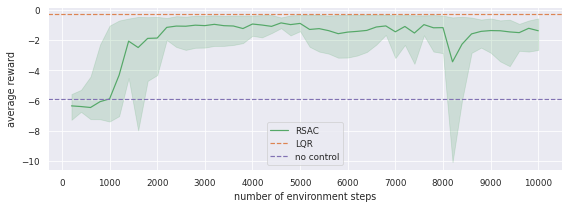

In [27]:
for system in ['orbital']:
    noise = 0

    env = environments[system]
    env.v = jnp.identity(2) * noise
    env.C = jnp.array([[1, 0], [0, 0]])

    plot_convergence_undercomplete(env, system, noise)


## Plot: Unknown Bias

### Trajectory

In [8]:
def simulate_lqr(env, x0):
    LQR = LQRSolver(env.A, env.B, env.G, env.R)
    X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
    info_lqr = {'X': X, 'R': R}
    return info_lqr

def simulate_rsac_UB(env, method, system, noise, Nep, x0, n_models=5, history_size=12, **kwargs):
    idx_range = kwargs.get('index_range', np.arange(n_models))
    info_sac = {'X': [], 'R': []}
    for idx in idx_range:
        filename = f'models/{method}/{system}/UB/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0, recurrent=True, history_size=history_size)
        info_sac['X'] += [X]
        info_sac['R'] += [R]
    return info_sac


In [9]:
def generate_flow(env, dims, N=10):
    env.v = jnp.identity(env.dim) * 0

    x_space = np.linspace(dims['xmin'], dims['xmax'], N)
    y_space = np.linspace(dims['ymin'], dims['ymax'], N)
    xv, yv = np.meshgrid(x_space, y_space)
    qx = np.zeros((N,N))
    qy = np.zeros((N,N))
    
    for i, x in enumerate(x_space):
        for j, y in enumerate(y_space):
            state = jnp.array([xv[i,j], yv[i,j]])
            dx, dy = env.predict_deriv(state, 0)
            qx[i,j] = dx
            qy[i,j] = dy
    return xv, yv, qx, qy


In [10]:
def plot_trajectory_UB(env, method, system, noise, Nep, x0, n_models=5, history_size=12, bias=1, **kwargs):
    dims = {'linear':{'xmin':-10, 'xmax':10, 'ymin':-5, 'ymax':5},
        'box':{'xmin':-5, 'xmax':5, 'ymin':-5, 'ymax':5},
        'orbital':{'xmin':-np.pi, 'xmax':np.pi, 'ymin':-4, 'ymax':4}}
    
    # Generate data
    info_lqr = simulate_lqr(env, x0)
    info_rsac = simulate_rsac_UB(env, method, system, noise, Nep, x0, n_models=n_models, history_size=history_size, **kwargs)
    xv, yv, qx, qy = generate_flow(env, dims[system])

    # Plot trajectory
    fig, ax = plt.subplots(figsize=(4, 3))

    ax.streamplot(xv, yv, qx, qy, density=.3, color='lightgrey')

    threshold = .5  # Adjust the threshold value as per your requirement
    for X in info_rsac['X']:
        if system == 'box':
            diff = np.abs(np.diff(X[:, 1]))
            invalid_indices = np.where(diff > threshold)[0] + 1  # Find the indices where the difference is less than the threshold
            X[invalid_indices, :] = np.nan  # Replace the values with NaNs
        elif system == 'orbital':
            diff = np.abs(np.diff(X[:, 0]))
            invalid_indices = np.where(diff > np.pi)[0] + 1  # Find the indices where the difference is less than the threshold
            X[invalid_indices, :] = np.nan  # Replace the values with NaNs
        ax.plot(X[:, 0], X[:, 1], linewidth=0.5, color=palette[2])

    # for X in info_rsac['X']:
    #     ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
    ax.plot([], [], linewidth=.5, color=palette[2], label='RSAC')

    X = info_lqr['X']
    ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

    ax.set_xlim([dims[system]['xmin'] - .5, dims[system]['xmax'] + .5])
    ax.set_ylim([dims[system]['ymin'] - .5, dims[system]['ymax'] + .5])
    ax.set_xticks(np.linspace(dims[system]['xmin'], dims[system]['xmax'], 5))
    if system == 'orbital':
        ax.set_xticklabels([r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    ax.set_yticks(np.linspace(dims[system]['ymin'], dims[system]['ymax'], 5))

    ax.set_xlabel(r'position ($x$)')
    ax.set_ylabel(r'velocity ($v$)')

    ax.legend()

    plt.tight_layout()

    # figurename = f'figures/{method}/{method}_{system}_UB_V{noise}_trajectory_b{bias}.png'
    # plt.savefig(figurename, dpi=300)

    plt.show()

    return info_lqr, info_rsac

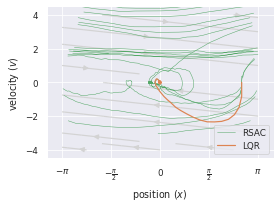

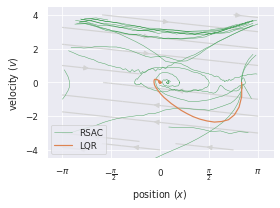

In [6]:
systems = ['linear', 'box', 'orbital']
environments = {'linear':Linear_SDI(), 'box':Box_SDI(), 'orbital':Orbital_SDI()}
starting_points = {'linear':jnp.array([10, 0]), 'box': jnp.array([4, 0]), 'orbital': jnp.array([(5/6)*np.pi, 0])}

method = 'RSAC'
noise = 0
Nep = 30000

for system in ['orbital']:
    env = environments[system]
    x0 = starting_points[system]

    env.v = jnp.identity(2) * noise
    env.B = jnp.array([0, 1])
    info_lqr_1, info_rsac_1 = plot_trajectory_UB(env, method, system, noise, Nep, x0, n_models=5, history_size=12, bias=1, index_range=np.arange(5, 10))

    env.v = jnp.identity(2) * noise
    env.B = jnp.array([0, -1])
    info_lqr_0, info_rsac_0 = plot_trajectory_UB(env, method, system, noise, Nep, x0, n_models=5, history_size=12, bias=-1, index_range=np.arange(5, 10))




Reward for B = -1: -87.80162531556562
Reward for B = 1: -8.590599853363528


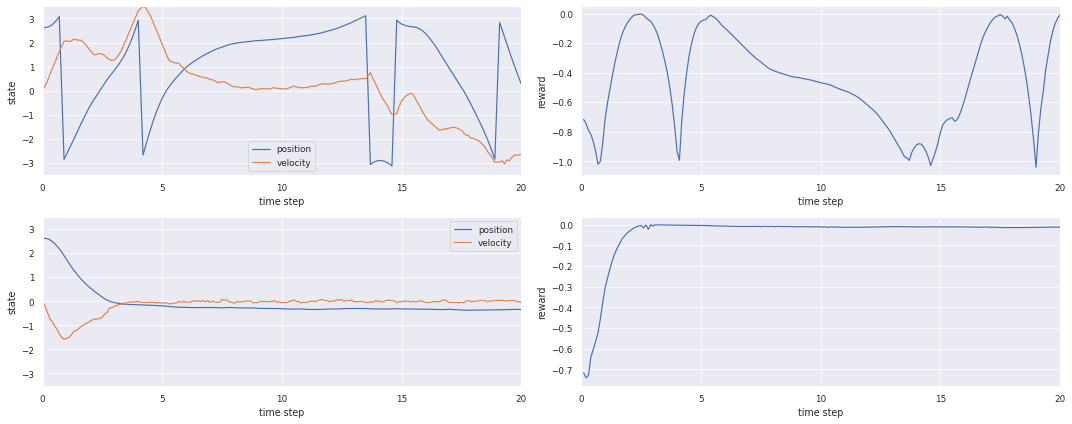

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))
ax = ax.flatten()

time_space = np.linspace(0, 20, 201)

idx = 1
sns.lineplot(x=time_space, y=info_rsac_0['X'][idx][:,0], ax=ax[0], label='position')
sns.lineplot(x=time_space, y=info_rsac_0['X'][idx][:,1], ax=ax[0], label='velocity')

sns.lineplot(x=time_space[1:], y=info_rsac_0['R'][idx], ax=ax[1])
print(f'Reward for B = -1: {np.sum(info_rsac_0["R"][idx])}')

sns.lineplot(x=time_space, y=info_rsac_1['X'][idx][:,0], ax=ax[2], label='position')
sns.lineplot(x=time_space, y=info_rsac_1['X'][idx][:,1], ax=ax[2], label='velocity')
sns.lineplot(x=time_space[1:], y=info_rsac_1['R'][idx], ax=ax[3])
print(f'Reward for B = 1: {np.sum(info_rsac_1["R"][idx])}')

for i in [0, 2]:
    ax[i].set_xlim([0, 20])
    ax[i].set_ylim([-3.5, 3.5])
    ax[i].set_xticks(np.arange(0, 21, 5))
    ax[i].set_xlabel('time step')
    ax[i].set_ylabel('state')
    ax[i].legend()

for i in [1, 3]:
    ax[i].set_xlim([0, 20])
    ax[i].set_xticks(np.arange(0, 21, 5))
    ax[i].set_xlabel('time step')
    ax[i].set_ylabel('reward')

plt.tight_layout()

plt.show()

### Convergence

In [31]:
def evaluate_training_UB(env, method, system, noise, Nep, x0_space, b=1, **kwargs):
    R_training = np.zeros((int(Nep/200), 5, I))
    for it, ep in enumerate(np.arange(200, Nep+200, 200)):
        R_training[it, :, :] = evaluate_rsac_UB(env, method, system, noise, ep, x0_space, **kwargs)
    ext = kwargs.get('extention', '')
    filename = f'data/{method}/{system}/UB_training_b{b}{ext}.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_training, handle, protocol=pickle.HIGHEST_PROTOCOL)

def evaluate_rsac_UB(env, method, system, noise, Nep, x0_space, **kwargs):
    R_jax = np.zeros((5, len(x0_space)))
    idx_range = kwargs.get('index_range', np.arange(5))
    for it, idx in enumerate(idx_range):
        filename = f'models/{method}/{system}/UB/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        if method == 'RSAC':
            R_jax[it,:] = test_SAC(key, controller, env, x0_space, recurrent=True, history_size=12)
        else:
            R_jax[it,:] = test_SAC(key, controller, env, x0_space)
    return R_jax

In [32]:
noise = 0
for method in ['RSAC']:
    for system in ['orbital']:
        for b in [-1, 1]:
            Nep = 30000
            I = 5

            env = environments[system]
            env.v = jnp.identity(2) * noise
            env.B = jnp.array([0, b])

            key = jrandom.PRNGKey(0)
            x0_space = jrandom.uniform(key, (I,2), minval=dims[system]['xmin'], maxval=dims[system]['xmax'])

            evaluate_training_UB(env, method, system, noise, Nep, x0_space, b=b, index_range=np.arange(5, 10), extention='_long')

it_space = np.arange(200, Nep+200, 200)

In [40]:
def plot_convergence_UB(env, system, noise, extention=''):
    # Load data
    filename = f'data/RSAC/{system}/UB_training_b{-1}{extention}.pickle'
    with open(filename, 'rb') as file:
        RSAC_0 = pickle.load(file)
    RSAC_0 = np.mean(RSAC_0, axis=2)

    filename = f'data/RSAC/{system}/UB_training_b{1}{extention}.pickle'
    with open(filename, 'rb') as file:
        RSAC_1 = pickle.load(file)
    RSAC_1 = np.mean(RSAC_1, axis=2)

    filename = f'data/RSAC/{system}/lqr_R{noise}.pickle'
    with open(filename, 'rb') as file:
        R_lqr = pickle.load(file)

    R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

    # Plot training progress
    fig, ax = plt.subplots(figsize=(8, 3))

    # mean = np.mean(RSAC_0, axis=1)
    # lower_bound = np.quantile(RSAC_0, 0, axis=1)
    # upper_bound = np.quantile(RSAC_0, 1, axis=1)
    # sns.lineplot(x=it_space, y=mean, ax=ax, color=palette[2], label=r'RSAC $b=-1$')
    # ax.fill_between(it_space, lower_bound, upper_bound, color=palette[2], alpha=.2)

    # mean = np.mean(RSAC_1, axis=1)
    # lower_bound = np.quantile(RSAC_1, 0, axis=1)
    # upper_bound = np.quantile(RSAC_1, 1, axis=1)
    # sns.lineplot(x=it_space, y=mean, ax=ax, color=palette[2], label=r'RSAC $b=1$')
    # ax.fill_between(it_space, lower_bound, upper_bound, color=palette[2], alpha=.2)

    mean = (np.mean(RSAC_1, axis=1) + np.mean(RSAC_0, axis=1))/2
    lower_bound = np.quantile(RSAC_1, 0, axis=1)
    upper_bound = np.quantile(RSAC_1, 1, axis=1)
    sns.lineplot(x=it_space, y=mean, ax=ax, color=palette[2], label=r'RSAC')
    ax.fill_between(it_space, lower_bound, upper_bound, color=palette[2], alpha=.2)

    plt.axhline(y=np.mean(R_lqr), color=palette[1], linestyle='--', label='LQR')
    plt.axhline(y=np.mean(R_zero), color=palette[4], linestyle='--', label='no control')

    # Layout
    xticks = np.linspace(0, 30000, 11)
    ax.set_xticks(xticks)

    ax.set_xlabel('number of environment steps')
    ax.set_ylabel('average reward')

    ax.legend(loc='lower center')

    plt.tight_layout()

    figurename = f'figures/{system}_training_UB+-{extention}.png'
    plt.savefig(figurename, dpi=300)

    plt.show()


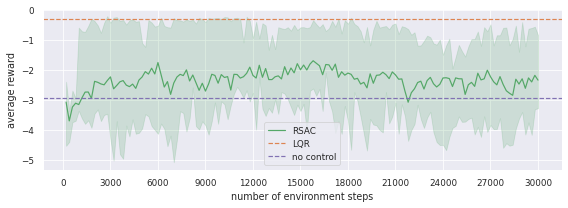

In [41]:
for system in ['orbital']:
    noise = 0

    env = environments[system]
    env.v = jnp.identity(2) * noise

    plot_convergence_UB(env, system, noise, extention='_long')


In [66]:
def plot_convergence_UB(env, system, noise, extention='', idx=0):
    # Load data
    filename = f'data/RSAC/{system}/UB_training_b{-1}{extention}.pickle'
    with open(filename, 'rb') as file:
        RSAC_0 = pickle.load(file)
    RSAC_0 = np.mean(RSAC_0, axis=2)

    filename = f'data/RSAC/{system}/UB_training_b{1}{extention}.pickle'
    with open(filename, 'rb') as file:
        RSAC_1 = pickle.load(file)
    RSAC_1 = np.mean(RSAC_1, axis=2)

    filename = f'data/RSAC/{system}/lqr_R{noise}.pickle'
    with open(filename, 'rb') as file:
        R_lqr = pickle.load(file)

    R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

    # Plot training progress
    fig, ax = plt.subplots(figsize=(8, 3))

    sns.lineplot(x=it_space, y=RSAC_1[:,idx], ax=ax, color=palette[2], label=r'RSAC $b=1$')
    sns.lineplot(x=it_space, y=RSAC_0[:,idx], ax=ax, color=palette[2], linestyle='dotted', label=r'RSAC $b=-1$')

    # mean = np.mean(RSAC_1, axis=1)
    # lower_bound = np.quantile(RSAC_1, 0, axis=1)
    # upper_bound = np.quantile(RSAC_1, 1, axis=1)
    # sns.lineplot(x=it_space, y=np.mean(RSAC_1, axis=1), ax=ax, color=palette[2], label=r'RSAC $b=1$')
    # ax.fill_between(it_space, lower_bound, upper_bound, color=palette[2], alpha=.2)

    plt.axhline(y=np.mean(R_lqr), color=palette[1], linestyle='--', label='LQR')
    plt.axhline(y=np.mean(R_zero), color=palette[4], linestyle='--', label='no control')

    # Layout
    xticks = np.linspace(0, 30000, 11)
    ax.set_xticks(xticks)

    ax.set_xlabel('number of environment steps')
    ax.set_ylabel('average reward')

    ax.legend(loc='lower center')

    plt.tight_layout()

    figurename = f'figures/{system}_training_UB+-{extention}_{idx}.png'
    plt.savefig(figurename, dpi=300)

    plt.show()

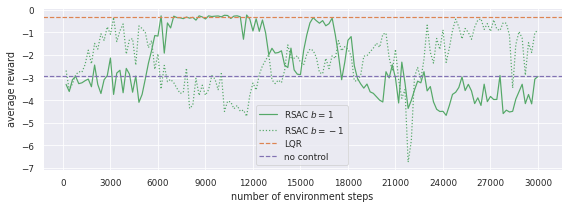

In [67]:
for system in ['orbital']:
    noise = 0

    env = environments[system]
    env.v = jnp.identity(2) * noise

    plot_convergence_UB(env, system, noise, extention='_long', idx=0)


## Plot: convergence during training

In [47]:
def evaluate_training(env, method, system, noise, Nep):
    R_training = np.zeros((int(Nep/200), 5, I))
    for it, ep in enumerate(np.arange(200, Nep+200, 200)):
        R_training[it, :, :] = evaluate_rsac(env, method, system, noise, ep)
    filename = f'data/{method}/{system}/training_v{noise}.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_training, handle, protocol=pickle.HIGHEST_PROTOCOL)

def evaluate_rsac(env, method, system, noise, Nep):
    R_jax = np.zeros((5, len(x0_space)))
    for idx in range(5):
        filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        if method == 'RSAC':
            R_jax[idx,:] = test_SAC(key, controller, env, x0_space, recurrent=True, history_size=12)
        else:
            R_jax[idx,:] = test_SAC(key, controller, env, x0_space)
    return R_jax

In [48]:
method = 'SAC'
for method in ['RSAC']:
    for system in ['orbital', 'box', 'linear']:
        for noise in [.5]:
            Nep = 10000
            I = 5

            env = environments[system]
            env.v = jnp.identity(2) * noise

            key = jrandom.PRNGKey(0)
            x0_space = jrandom.uniform(key, (I,2), minval=dims[system]['xmin'], maxval=dims[system]['xmax'])

            evaluate_training(env, method, system, noise, Nep)

it_space = np.arange(200, Nep+200, 200)

In [49]:
def plot_convergence(env, system, noise):
    # Load data
    filename = f'data/SAC/{system}/training_v{noise}.pickle'
    with open(filename, 'rb') as file:
        SAC_train = pickle.load(file)
    SAC_train = np.mean(SAC_train, axis=2)

    filename = f'data/RSAC/{system}/training_v{noise}.pickle'
    with open(filename, 'rb') as file:
        RSAC_train = pickle.load(file)
    RSAC_train = np.mean(RSAC_train, axis=2)

    filename = f'data/RSAC/{system}/lqr_R{noise}.pickle'
    with open(filename, 'rb') as file:
        R_lqr = pickle.load(file)

    R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

    # Plot training progress
    fig, ax = plt.subplots(figsize=(8, 3))

    mean = np.mean(SAC_train, axis=1)
    lower_bound = np.quantile(SAC_train, 0, axis=1)
    upper_bound = np.quantile(SAC_train, 1, axis=1)
    sns.lineplot(x=it_space, y=np.mean(SAC_train, axis=1), ax=ax, color=palette[0], label='SAC')
    ax.fill_between(it_space, lower_bound, upper_bound, color=palette[0], alpha=.2)

    mean = np.mean(RSAC_train, axis=1)
    lower_bound = np.quantile(RSAC_train, 0, axis=1)
    upper_bound = np.quantile(RSAC_train, 1, axis=1)
    sns.lineplot(x=it_space, y=np.mean(RSAC_train, axis=1), ax=ax, color=palette[2], label='RSAC')
    ax.fill_between(it_space, lower_bound, upper_bound, color=palette[2], alpha=.2)

    plt.axhline(y=np.mean(R_lqr), color=palette[1], linestyle='--', label='LQR')
    plt.axhline(y=np.mean(R_zero), color=palette[4], linestyle='--', label='no control')

    # Layout
    xticks = np.linspace(0, 10000, 11)
    ax.set_xticks(xticks)

    ax.set_xlabel('number of environment steps')
    ax.set_ylabel('average reward')

    ax.legend(loc='lower center')

    plt.tight_layout()

    figurename = f'figures/{system}_training_v{noise}.png'
    plt.savefig(figurename, dpi=300)

    plt.show()


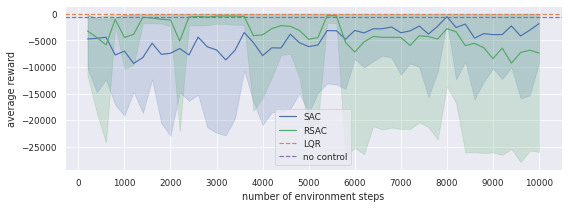

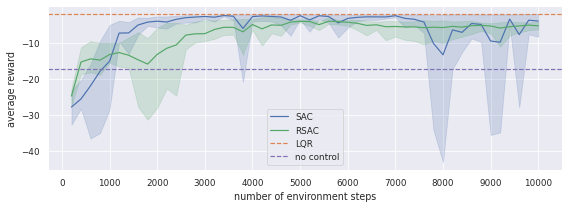

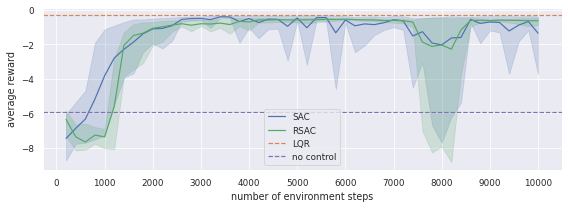

In [23]:
for system in ['linear', 'box', 'orbital']:
    noise = 0

    env = environments[system]
    env.v = jnp.identity(2) * noise

    plot_convergence(env, system, noise)


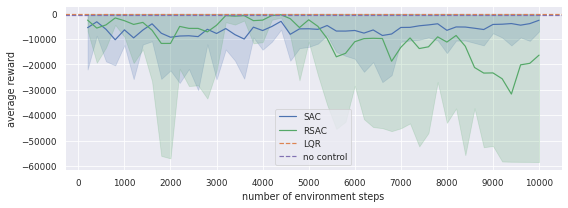

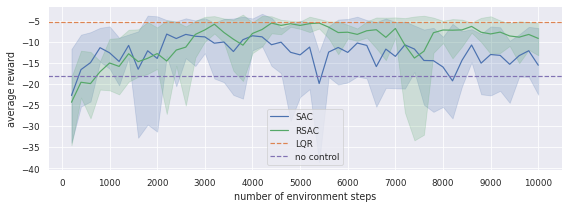

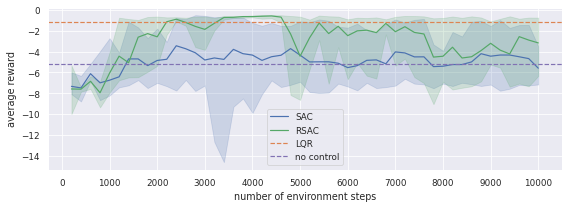

In [50]:
for system in ['linear', 'box', 'orbital']:
    noise = .5

    env = environments[system]
    env.v = jnp.identity(2) * noise

    plot_convergence(env, system, noise)


## Box-plots

### Generate data

In [31]:
def evaluate_rsac(env, method, system, noise, Nep):
    Nep = 10000
    R_jax = np.zeros((5, I))
    for idx in range(5):
        filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        if method == 'RSAC':
            R_jax[idx,:] = test_SAC(key, controller, env, x0_space, recurrent=True, history_size=12)
        else:
            R_jax[idx,:] = test_SAC(key, controller, env, x0_space)
    filename = f'data/{method}/{system}/rsac_jax_R{noise}.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_jax, handle, protocol=pickle.HIGHEST_PROTOCOL)

def test_LQR(key, LQR, env, x0_space, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_LQR(env, LQR, T=T, dt=dt, x0=x0)
        R[i] = np.sum(rew) / T
    return R

def evaluate_lqr(env, method, system, noise):
    LQR = LQRSolver(env.A, env.B, env.G, env.R)
    R_lqr = test_LQR(key, LQR, env, x0_space)

    filename = f'data/{method}/{system}/lqr_R{noise}.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_lqr, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
systems = ['linear', 'box', 'orbital']
environments = {'linear':Linear_SDI(), 'box':Box_SDI(), 'orbital':Orbital_SDI()}
starting_points = {'linear':jnp.array([10, 0]), 'box': jnp.array([4, 0]), 'orbital': jnp.array([(5/6)*np.pi, 0])}

dims = {'linear':{'xmin':-10, 'xmax':10, 'ymin':-5, 'ymax':5},
        'box':{'xmin':-5, 'xmax':5, 'ymin':-5, 'ymax':5},
        'orbital':{'xmin':-np.pi, 'xmax':np.pi, 'ymin':-4, 'ymax':4}}

for system in systems:
        method = 'RSAC'
        #system = 'linear'
        noise = .5
        Nep = 10000

        env = environments[system]
        env.v = jnp.identity(2) * noise

        I = 10
        key = jrandom.PRNGKey(0)
        x0_space = jrandom.uniform(key, (I,2), minval=dims[system]['xmin'], maxval=dims[system]['xmax'])

        evaluate_rsac(env, method, system, noise, Nep)
        # evaluate_lqr(env, method, system, noise)

### Plot boxplots

In [33]:
def plot_boxplot(env, method, system, noise):
    # Load data
    R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

    filename = f'data/{method}/{system}/rsac_jax_R{noise}.pickle'
    with open(filename, 'rb') as handle:
        R_jax = pickle.load(handle)

    filename = f'data/{method}/{system}/lqr_R{noise}.pickle'
    with open(filename, 'rb') as handle:
        R_lqr = pickle.load(handle)
    
    # Plot boxplot
    fig, ax = plt.subplots(figsize=(4, 3))

    colors = [palette[2], palette[1], palette[0]]

    sns.boxplot(data=[R_zero, R_lqr, R_jax.flatten()], palette=colors, ax=ax)
    plt.axhline(y=np.median(R_lqr), color=palette[1], linestyle='--', label='LQR')
    plt.axhline(y=np.median(R_zero), color=palette[2], linestyle='--', label='no control')

    # layout
    ax.set_ylabel('average reward')
    if system == 'linear':
        ax.set_yscale('symlog')
        ax.set_ylim([-4*10**4, 0])

    ax.set_xticklabels(['no control', 'LQR', 'SAC\n(JAX)'])
    ax.set_xlabel({'linear': 'LQ system', 'box': 'box-constrained system', 'orbital': 'orbiting system'}[system])

    ax.legend(loc='lower center')

    plt.tight_layout()

    figurename = f'figures/{method}/{method}_{system}_V{noise}_boxplot.png'
    plt.savefig(figurename, dpi=300)

    plt.show()

def plot_comparison(env, system, noise, legend=True):
    # Load data
    R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

    filename = f'data/SAC/{system}/sac_jax_R{noise}.pickle'
    with open(filename, 'rb') as handle:
        R_SAC = pickle.load(handle)

    filename = f'data/RSAC/{system}/rsac_jax_R{noise}.pickle'
    with open(filename, 'rb') as handle:
        R_RSAC = pickle.load(handle)
    
    filename = f'data/RSAC/{system}/lqr_R{noise}.pickle'
    with open(filename, 'rb') as handle:
        R_lqr = pickle.load(handle)
    
    # Plot boxplot
    fig, ax = plt.subplots(figsize=(2.5, 3))

    colors = [palette[0], palette[2]]

    sns.boxplot(data=[R_SAC, R_RSAC], palette=colors, ax=ax)
    plt.axhline(y=np.median(R_lqr), color=palette[1], linestyle='--', label='LQR')
    plt.axhline(y=np.median(R_zero), color=palette[4], linestyle='--', label='no control')

    # layout
    ax.set_ylabel('average reward')
    if system == 'linear':
        ax.set_yscale('symlog')
        ax.set_ylim([-4*10**4, 0])

    ax.set_xticklabels(['SAC', 'RSAC'])
    ax.set_xlabel({'linear': 'LQ system', 'box': 'box-constrained system', 'orbital': 'orbiting system'}[system])

    if legend:
        ax.legend(loc='upper center')

    plt.tight_layout()

    figurename = f'figures/{system}_comparison_boxplot_v{noise}.png'
    plt.savefig(figurename, dpi=300)

    plt.show()



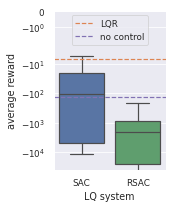

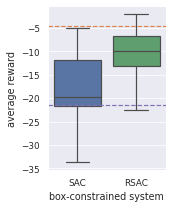

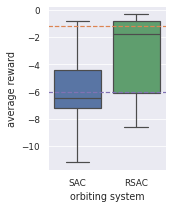

In [36]:
method = 'RSAC'
noise = 0.5

systems = ['linear', 'box', 'orbital']
for system in systems:
    env = environments[system]

    env.v = jnp.identity(2) * noise
    plot_comparison(env, system, noise, legend=(system=='linear'))

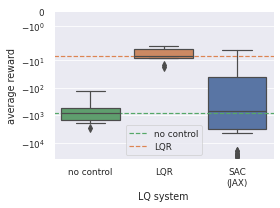

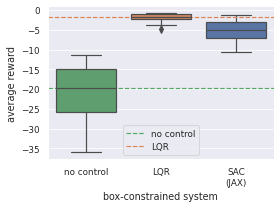

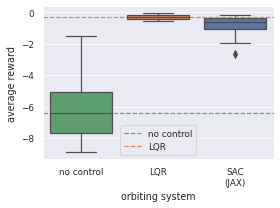

In [72]:
# method = 'RSAC'
# noise = 0

# systems = ['linear', 'box', 'orbital']
# for system in systems:
#     env = environments[system]

#     env.v = jnp.identity(2) * noise
#     plot_boxplot(env, method, system, noise)

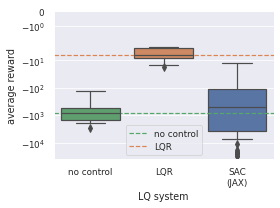

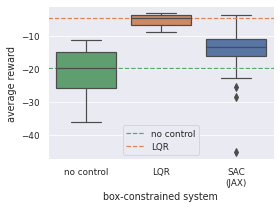

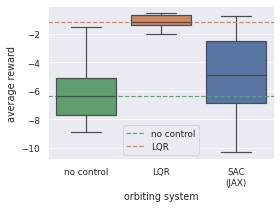

In [73]:
# method = 'RSAC'
# noise = .5

# systems = ['linear', 'box', 'orbital']
# for system in systems:
#     env = environments[system]

#     env.v = jnp.identity(2) * noise
#     plot_boxplot(env, method, system, noise)

## Increasing noise

In [37]:
method = 'RSAC'
system = 'orbital'
history_size = 12

I = 10
key = jrandom.PRNGKey(0)
x0_space = jrandom.uniform(key, (I,2), minval=-10, maxval=10)

env = environments[system]
env.v = jnp.identity(2) * 0

for noise in [.1, .2, .3, .4]:
    env.v = jnp.identity(2) * noise
    Nep = 10000
    R_jax = np.zeros((5, I))
    for idx in range(5):
        filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        R_jax[idx,:] = test_SAC(key, controller, env, x0_space, recurrent=True, history_size=history_size)
    filename = f'data/{method}/{system}/rsac_jax_R{noise}.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_jax, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [38]:
method = 'RSAC'
system = 'orbital'
env = environments[system]

def test_LQR(key, LQR, env, x0_space, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_LQR(env, LQR, T=T, dt=dt, x0=x0)
        R[i] = np.sum(rew) / T
    return R

env.v = jnp.identity(2) * 0
LQR = LQRSolver(env.A, env.B, env.G, env.R)
R_lqr = test_LQR(key, LQR, env, x0_space)

R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

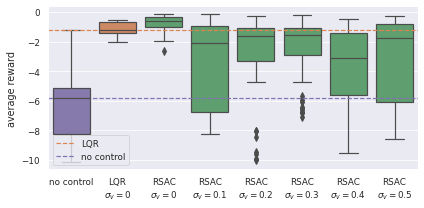

In [46]:
method = 'RSAC'
system = 'orbital'
env = environments[system]

data = [R_zero, R_lqr]
noise_levels = [0, .1, .2, .3, .4, .5]
for noise in noise_levels:
    filename = f'data/{method}/{system}/rsac_jax_R{noise}.pickle'
    with open(filename, 'rb') as file:
        R = pickle.load(file)
        data += [R.flatten()]

fig, ax = plt.subplots(figsize=(6, 3))
colors = [palette[4], palette[1]] + [palette[2]] * (len(data) - 2)
sns.boxplot(data=data, palette=colors, ax=ax)

plt.axhline(y=np.median(R_lqr), color=palette[1], linestyle='--', label='LQR')
plt.axhline(y=np.median(R_zero), color=palette[4], linestyle='--', label='no control')


#ax.set_xlabel(r'observation noise ($\sigma_v$)')
ax.set_ylabel('average reward')

ax.set_xticklabels(['no control', fr'LQR\n$\sigma_v=0$'.replace(r'\n', '\n')] + [fr'RSAC\n$\sigma_v=${noise}'.replace(r'\n', '\n') for noise in noise_levels])

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_boxplot_varyingNoise.png'
plt.savefig(figurename, dpi=300)

plt.show()


## Test

In [36]:
def import_params(method, system, noise, Nep, idx):
    filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        params = pickle.load(file)
    
    vf = params['vt']
    q1 = params['q1']
    q2 = params['q2']
    pi = params['pi']

    return vf, q1, q2, pi


In [37]:

def generate_maps(vf, q1, q2, system, u=0):
    x_space = np.linspace(dims[system]['xmin'], dims[system]['xmax'], 10)
    y_space = np.linspace(dims[system]['ymin'], dims[system]['ymax'], 10)
    #u_space = np.linspace(-4, 4, 10)

    xv, yv = np.meshgrid(x_space, y_space)
    V = np.zeros((10,10))
    Q1 = np.zeros((10,10))
    Q2 = np.zeros((10,10))
    Qmin = np.zeros((10,10))

    for i, x in enumerate(x_space):
        for j, y in enumerate(y_space):
            state = jnp.array([x, y])
            control = u
            V[i,j] = vf(state)
            Q1[i,j] = q1(state, control)
            Q2[i,j] = q2(state, control)
            Qmin[i,j] = np.min([Q1[i,j], Q2[i,j]])
    
    return V, Q1, Q2, Qmin


In [44]:
def plot_maps(map, system, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 3))

    sns.heatmap(map, ax=ax)
    ax.invert_yaxis()
    ax.set_xticks(np.linspace(.5, 9.5, 5), np.linspace(dims[system]['xmin'], dims[system]['xmax'], 5).round(1))
    ax.set_yticks(np.linspace(.5, 9.5, 5), np.linspace(dims[system]['ymin'], dims[system]['ymax'], 5).round(1))
    ax.set_title(kwargs.get('title', ''))

    plt.show()




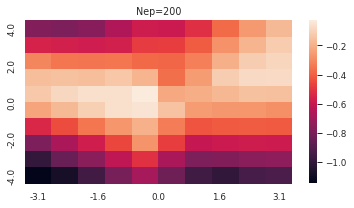

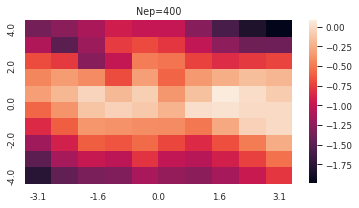

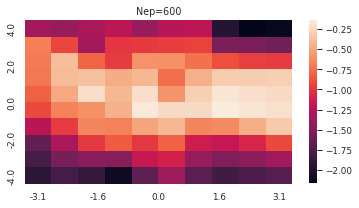

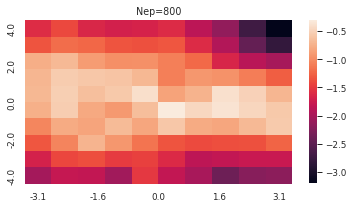

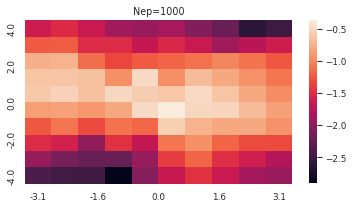

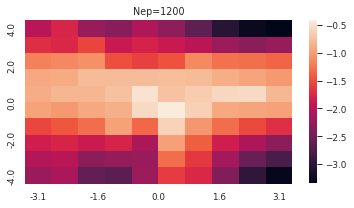

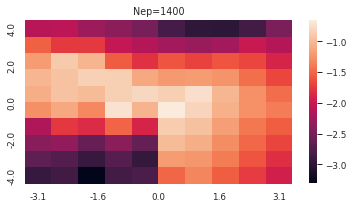

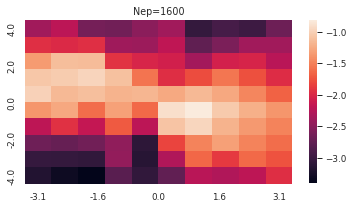

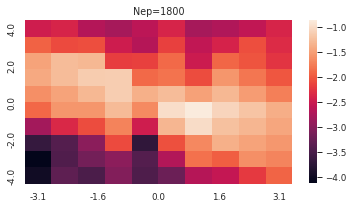

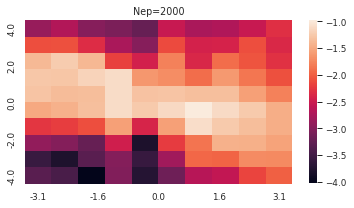

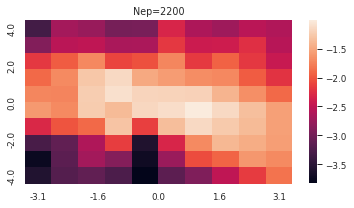

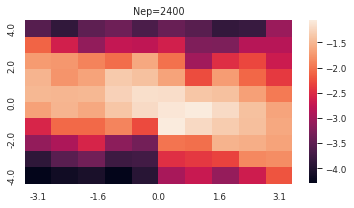

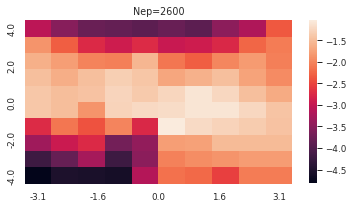

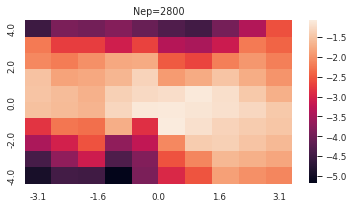

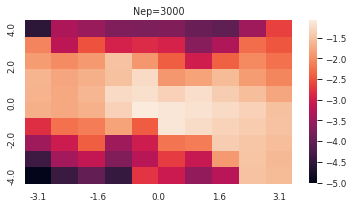

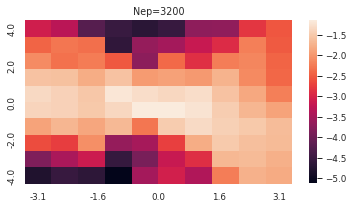

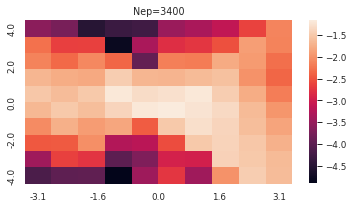

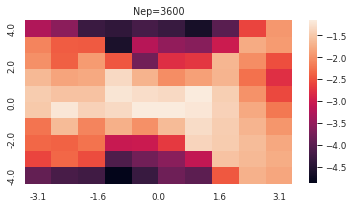

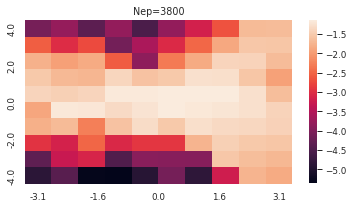

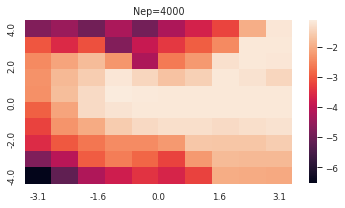

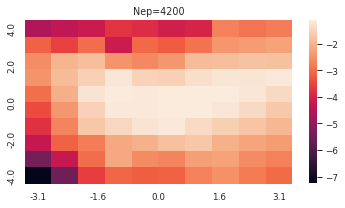

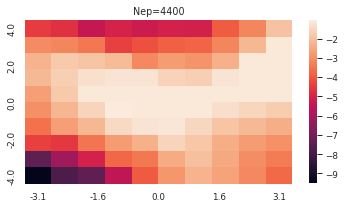

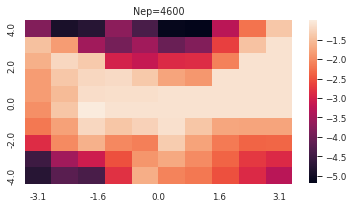

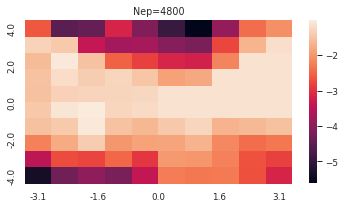

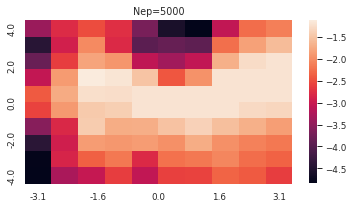

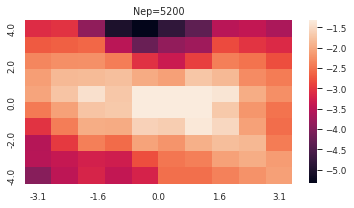

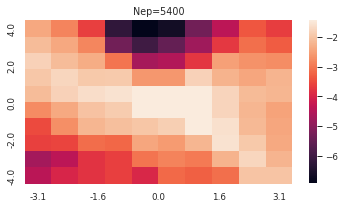

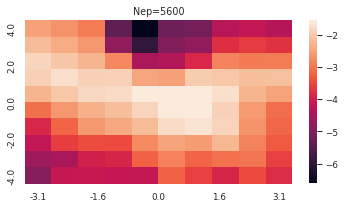

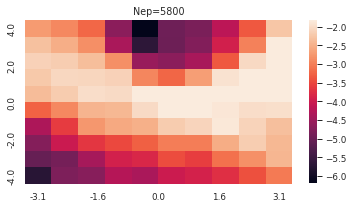

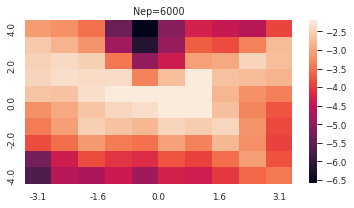

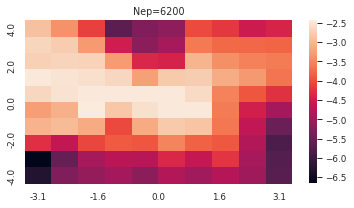

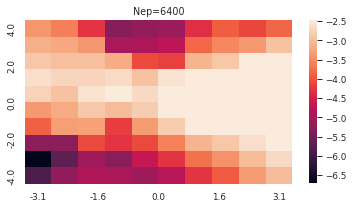

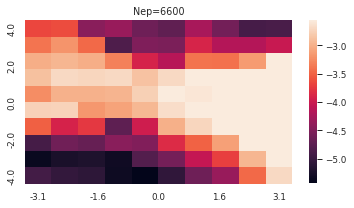

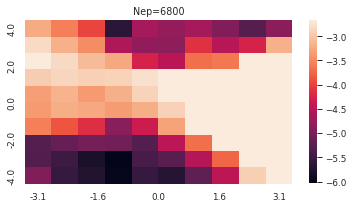

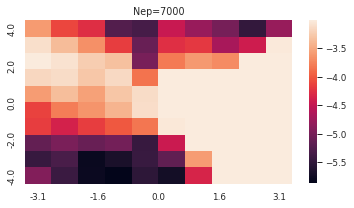

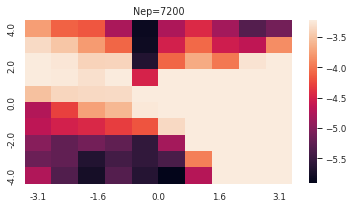

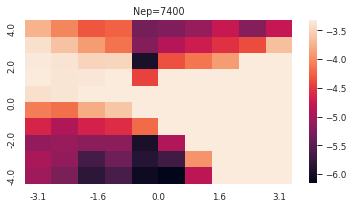

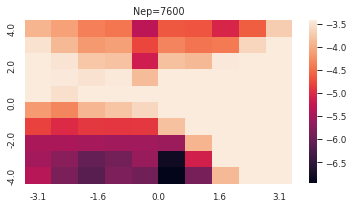

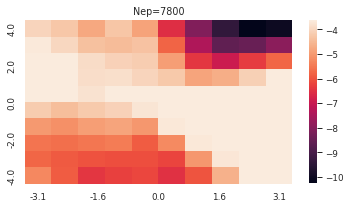

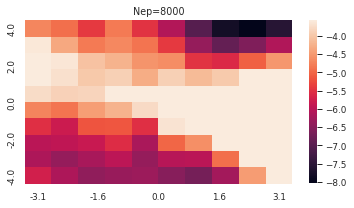

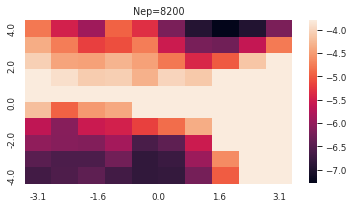

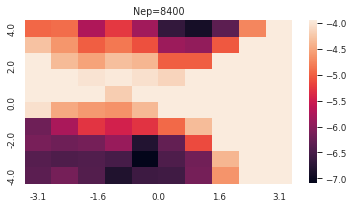

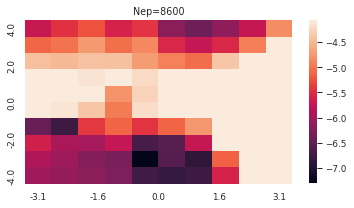

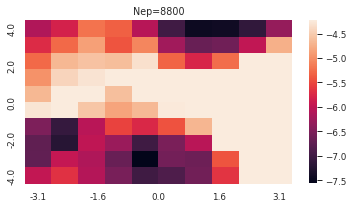

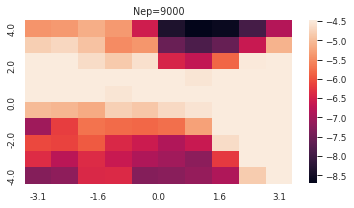

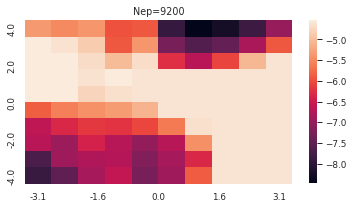

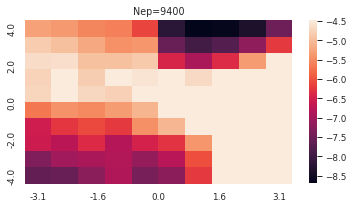

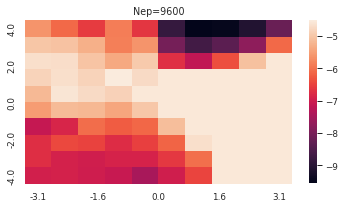

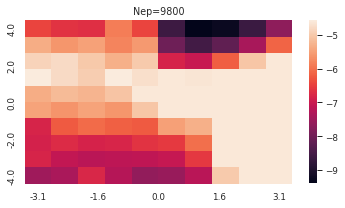

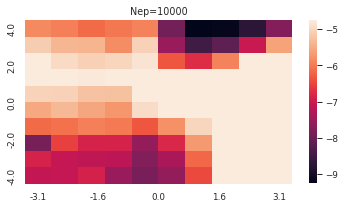

In [46]:
method = 'SAC'
system = 'orbital'
noise = .5
Nep = 10000
idx = 1

for ep in np.arange(200, Nep+200, 200):
    vf, q1, q2, pi = import_params(method, system, noise, ep, idx)
    V, Q1, Q2, Qmin = generate_maps(vf, q1, q2, system, u=0)
    plot_maps(Qmin, system, title=f'Nep={ep}')
